In [ ]:
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization
from keras.datasets import mnist
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

In [ ]:
model=Sequential()
model.add(Conv2D(6,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(6,kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 6)         24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 6)         330       
                                                                 
 batch_normalization_5 (Bat  (None, 13, 13, 6)         24        
 chNormalization)                                                
                                                      

In [ ]:
plot_model(model,show_shapes=True)

NameError: name 'plot_model' is not defined

In [ ]:
callbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
model.fit(x_train,y_train,epochs=1,callbacks=callbacks,batch_size=32,validation_data=(x_test,y_test))

1875/1875 [==============================] - 11s 5ms/step - loss: 0.4441 - accuracy: 0.8583 - val_loss: 0.1338 - val_accuracy: 0.9611


In [ ]:
y_pred=(model.predict(x_test))

313/313 [==============================] - 1s 2ms/step


In [ ]:

model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9611


[0.13379529118537903, 0.9610999822616577]

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 969    2    0    0    2    0    2    4    1    0]
 [   0 1127    3    1    0    1    2    1    0    0]
 [   3   11  998    5    3    0    0   12    0    0]
 [   1    0   11  977    0   10    0    8    2    1]
 [   0    5    2    1  940    0    4    1    1   28]
 [   4    1    2   11    1  856    5    2    1    9]
 [  10    5    4    0    5    2  931    0    1    0]
 [   0    6   17    2    1    0    0  990    1   11]
 [  17    9   25    6   10   10   11   10  858   18]
 [   2    7    3    9    7    3    0   13    0  965]]


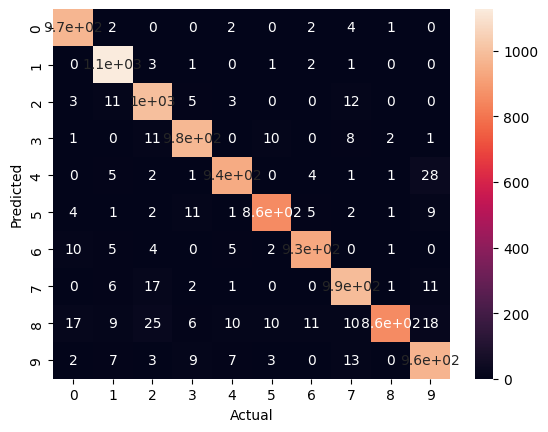

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.99      0.95      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.94      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="SGD",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=3,batch_size=32,callbacks=callbacks,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1314 - accuracy: 0.9628 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1251 - accuracy: 0.9635 - val_loss: 0.0686 - val_accuracy: 0.9791
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1195 - accuracy: 0.9662 - val_loss: 0.0661 - val_accuracy: 0.9795


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0661 - accuracy: 0.9795


[0.06605976819992065, 0.9794999957084656]